In [1]:
import requests
import s3fs
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
import numpy as np 
import matplotlib.pyplot as plt


In [2]:
access_key = "G558I833UBL38WJ6XLPM"
secret_key = "2LjI0sdv4Ghre3VpkGBYnVzWrbHTk757Lu+1zjsC"
token = "eyJhbGciOiJIUzUxMiIsInR5cCI6IkpXVCJ9.eyJhY2Nlc3NLZXkiOiJHNTU4STgzM1VCTDM4V0o2WExQTSIsImFsbG93ZWQtb3JpZ2lucyI6WyIqIl0sImF1ZCI6WyJtaW5pby1kYXRhbm9kZSIsIm9ueXhpYSIsImFjY291bnQiXSwiYXV0aF90aW1lIjoxNzMyNzE4ODIwLCJhenAiOiJvbnl4aWEiLCJlbWFpbCI6ImNvbGluLmxpY2hlcmVAZW5zYWUuZnIiLCJlbWFpbF92ZXJpZmllZCI6dHJ1ZSwiZXhwIjoxNzM0MTgxNTA4LCJmYW1pbHlfbmFtZSI6IkxpY2jDqHJlIiwiZ2l2ZW5fbmFtZSI6IkNvbGluIiwiZ3JvdXBzIjpbIlVTRVJfT05ZWElBIl0sImlhdCI6MTczMzU3NjcwOCwiaXNzIjoiaHR0cHM6Ly9hdXRoLmxhYi5zc3BjbG91ZC5mci9hdXRoL3JlYWxtcy9zc3BjbG91ZCIsImp0aSI6IjFjMjU5YmIyLTZjMDAtNGRkNS1iZGFhLThjMWU4N2MzZDE1MSIsIm5hbWUiOiJDb2xpbiBMaWNow6hyZSIsInBvbGljeSI6InN0c29ubHkiLCJwcmVmZXJyZWRfdXNlcm5hbWUiOiJjbGljaGVyZSIsInJlYWxtX2FjY2VzcyI6eyJyb2xlcyI6WyJvZmZsaW5lX2FjY2VzcyIsInVtYV9hdXRob3JpemF0aW9uIiwiZGVmYXVsdC1yb2xlcy1zc3BjbG91ZCJdfSwicmVzb3VyY2VfYWNjZXNzIjp7ImFjY291bnQiOnsicm9sZXMiOlsibWFuYWdlLWFjY291bnQiLCJtYW5hZ2UtYWNjb3VudC1saW5rcyIsInZpZXctcHJvZmlsZSJdfX0sInJvbGVzIjpbIm9mZmxpbmVfYWNjZXNzIiwidW1hX2F1dGhvcml6YXRpb24iLCJkZWZhdWx0LXJvbGVzLXNzcGNsb3VkIl0sInNjb3BlIjoib3BlbmlkIHByb2ZpbGUgZ3JvdXBzIGVtYWlsIiwic2lkIjoiOGJlYTQ2MzctYTUzMi00YTY2LTkxOTctMDY3NDliYTMxZDVjIiwic3ViIjoiY2RkOGM5MzYtNWUxYy00OTE4LWIxMmItMjgzNjY1NzY5YTFlIiwidHlwIjoiQmVhcmVyIn0.iZazPSQeCUZSJ-QSaQduhl_kNl1PeNU_i4o09zGSKPdHfHQVbMdp5bmWLaVmAUE2Rrs3HwpTnk_tFaga-wpC8g"


In [3]:
fs = s3fs.S3FileSystem(client_kwargs={"endpoint_url": "https://minio.lab.sspcloud.fr"}, key=access_key,
        secret=secret_key, token=token)

# Testez la connexion en listant les fichiers d’un bucket
try:
    files = fs.ls("clichere")  # Remplacez par le nom de votre bucket
    print("Connexion réussie. Fichiers disponibles :", files)
except Exception as e:
    print("Erreur lors de la connexion :", e)

def read_csv_from_s3(path: str, columns_to_select: list, dtype_spec: dict, encoding: str = "utf-8") -> pd.DataFrame:
  
    with fs.open(path, mode="r", encoding=encoding) as file:
        df = pd.read_csv(file, usecols=columns_to_select, dtype=dtype_spec)
    
    return df

def plot_hist(series, title_suffix=""):
    plt.figure(figsize=(8, 6))
    plt.hist(series.dropna(), bins=30, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f"Histogram {title_suffix}")
    plt.xlabel("Valeurs")
    plt.ylabel("Fréquence")
    plt.grid(axis='y', alpha=0.75)
    plt.show()


Connexion réussie. Fichiers disponibles : ['clichere/diffusion']


1. Revenus par habitant et population par commune

In [4]:
# Définir les colonnes à sélectionner et les types de données
columns_to_select = ["codecommune", "nomcommune", "pop2022", "revmoy2022"]
dtype_spec = {'codecommune': 'str'}

# Lire le fichier CSV depuis S3
path_revcommunes = "clichere/diffusion/revcommunes.csv"
revcommunes = read_csv_from_s3(path_revcommunes, columns_to_select, dtype_spec)

# Afficher un aperçu des données lues ainsi que les statistiques descriptives
print(revcommunes.head())

print(revcommunes.describe())

  codecommune             nomcommune  pop2022  revmoy2022
0       01001  ABERGEMENT-CLEMENCIAT      747   21615.654
1       01002    ABERGEMENT-DE-VAREY      288   16945.766
2       01004      AMBERIEU-EN-BUGEY    14375   18423.111
3       01005    AMBERIEUX-EN-DOMBES     1717   20996.125
4       01006                AMBLEON      116   18075.986
            pop2022     revmoy2022
count  3.666100e+04   34746.000000
mean   1.925007e+03   17051.483011
std    1.495215e+04    5197.378499
min    0.000000e+00    3350.483900
25%    1.820000e+02   14012.091750
50%    4.290000e+02   16322.690500
75%    1.118000e+03   19126.264250
max    2.118266e+06  126903.910000


2. Taux de diplome par commune

In [5]:
# Définir les colonnes à sélectionner et les types de données
columns_to_select = ["codecommune","pbac2022", "psup2022"]
dtype_spec = {'codecommune': 'str'}

# Lire le fichier CSV depuis S3
path_dipcommunes = "clichere/diffusion/diplomescommunes.csv"
dipcommunes = read_csv_from_s3(path_dipcommunes, columns_to_select, dtype_spec)

# Afficher un aperçu des données lues ainsi que les statistiques descriptives
print(dipcommunes.head())

print(dipcommunes.describe())


  codecommune  pbac2022  psup2022
0       01001  0.447140  0.232236
1       01002  0.672414  0.086207
2       01003       NaN       NaN
3       01004  0.461044  0.289937
4       01005  0.337925  0.168558
           pbac2022      psup2022
count  35222.000000  35222.000000
mean       0.460833      0.274160
std        0.199317      0.174347
min        0.000000      0.000000
25%        0.333333      0.157895
50%        0.451748      0.259494
75%        0.575221      0.372092
max        1.000000      1.000000


3. Fusionner les bases de données

In [6]:
rev_dip_pop_comm = pd.merge(revcommunes, dipcommunes, on='codecommune', how='inner')


print(rev_dip_pop_comm)

      codecommune             nomcommune  pop2022  revmoy2022  pbac2022  \
0           01001  ABERGEMENT-CLEMENCIAT      747   21615.654  0.447140   
1           01002    ABERGEMENT-DE-VAREY      288   16945.766  0.672414   
2           01004      AMBERIEU-EN-BUGEY    14375   18423.111  0.461044   
3           01005    AMBERIEUX-EN-DOMBES     1717   20996.125  0.337925   
4           01006                AMBLEON      116   18075.986  1.000000   
...           ...                    ...      ...         ...       ...   
36627       95676     VILLERS-EN-ARTHIES      529   20655.250  0.533520   
36628       95678          VILLIERS-ADAM      927   26113.932  0.891641   
36629       95680        VILLIERS-LE-BEL    27033   11837.685  0.436124   
36630       95682        VILLIERS-LE-SEC      248   18516.314  0.270115   
36631       95690    WY-DIT-JOLY-VILLAGE      375   25304.949  0.871795   

       psup2022  
0      0.232236  
1      0.086207  
2      0.289937  
3      0.168558  
4      0.

In [75]:
output_path1 = 'clichere/diffusion/rev_dip_pop_comm.parquet'
output_path2 = 'clichere/diffusion/revcommunes.parquet'
output_path3 = 'clichere/diffusion/dipcommunes.parquet'

# Exporter le DataFrame en format Parquet sur S3
rev_dip_pop_comm.to_parquet(output_path1, engine='pyarrow', compression='snappy', filesystem=fs)
revcommunes.to_parquet(output_path2, engine='pyarrow', compression='snappy', filesystem=fs)
dipcommunes.to_parquet(output_path3, engine='pyarrow', compression='snappy', filesystem=fs)


In [7]:
# Calculer le nombre de valeurs manquantes (NA) par colonne
na_counts = rev_dip_pop_comm.isna().sum()
na_percentage = rev_dip_pop_comm.isna().mean() * 100

# Afficher les résultats
print(na_counts)
print(na_percentage)

codecommune       0
nomcommune        7
pop2022           0
revmoy2022     1912
pbac2022       1410
psup2022       1410
dtype: int64
codecommune    0.000000
nomcommune     0.019109
pop2022        0.000000
revmoy2022     5.219480
pbac2022       3.849094
psup2022       3.849094
dtype: float64


4. Récupération de la base de données de travail

In [9]:
dataset = pq.ParquetDataset('aayrapetyan/diffusion/final_table.parquet', filesystem=fs)
final_dataset = dataset.read().to_pandas()

# Afficher les premières lignes
print(final_dataset.head())

   total_voyageurs_2022               nom_gare       uic codeinsee  lon_gare  \
0                 40825               Abbaretz  87481614     44001 -1.524416   
1                177092  Achères Grand Cormier  87386052     78551  2.091903   
2                 80648        Achiet-le-Grand  87342048     62005  2.780168   
3                 32800                   Agay  87757559     83118  6.856500   
4                 11325          Aigues-Mortes  87775858     30003  4.191210   

    lat_gare codecommune             nomcommune  pop2022  revmoy2022  \
0  47.554643       44001               ABBARETZ   2257.0   12567.249   
1  48.955183       78551  SAINT-GERMAIN-EN-LAYE  39172.0   41601.988   
2  50.131752       62005        ACHIET-LE-GRAND    888.0   15813.034   
3  43.431370       83118          SAINT-RAPHAEL  37114.0   26637.975   
4  43.570901       30003          AIGUES-MORTES   8076.0   20798.898   

   pbac2022  psup2022  dist_closest_station_km  nb_stations_same_commune  \
0  0.27279

In [10]:
select_columns = ['pop2022', 'revmoy2022', 'pbac2022', 'psup2022']

print(rev_dip_pop_comm[select_columns].describe())
print(final_dataset[select_columns].describe())

             pop2022     revmoy2022      pbac2022      psup2022
count   36632.000000   34720.000000  35222.000000  35222.000000
mean     1829.919387   17049.742626      0.460833      0.274160
std      9954.647803    5194.780298      0.199317      0.174347
min         0.000000    3350.483900      0.000000      0.000000
25%       182.000000   14011.968000      0.333333      0.157895
50%       428.000000   16321.857000      0.451748      0.259494
75%      1116.000000   19124.010750      0.575221      0.372092
max    875791.000000  126903.910000      1.000000      1.000000
             pop2022     revmoy2022     pbac2022     psup2022
count    2808.000000    2808.000000  2808.000000  2808.000000
mean    18078.540954   18221.520429     0.460001     0.293846
std     50290.901554    6608.596156     0.134600     0.132249
min        55.000000    5818.043000     0.000000     0.000000
25%      1570.250000   14922.083000     0.367286     0.203781
50%      4067.500000   16931.457000     0.453300    

On voit que la population moyenne diminue lorsque l'on sélectionne les communes ayant une gare. Cela correspond au fait que les petites communes ont moins de chance d'avoir une gare. On passe de 36000 communes à 2800 communes, ce qui donne tout de même beaucoup d'observations. Le revenu est légèrement supérieur ainsi que la part des habitants qui ont un diplôme du supérieur dans les villes où il y a une gare. Cela nous donne une première indication sur ce que l'on cherche à montrer : une relation positive entre le revenu et la fréquentation des gares. 

5. Création d'une nouvelle variable

In [11]:
final_dataset['freq_par_hab']= final_dataset['total_voyageurs_2022']/final_dataset['pop2022']
print(final_dataset.head())

   total_voyageurs_2022               nom_gare       uic codeinsee  lon_gare  \
0                 40825               Abbaretz  87481614     44001 -1.524416   
1                177092  Achères Grand Cormier  87386052     78551  2.091903   
2                 80648        Achiet-le-Grand  87342048     62005  2.780168   
3                 32800                   Agay  87757559     83118  6.856500   
4                 11325          Aigues-Mortes  87775858     30003  4.191210   

    lat_gare codecommune             nomcommune  pop2022  revmoy2022  \
0  47.554643       44001               ABBARETZ   2257.0   12567.249   
1  48.955183       78551  SAINT-GERMAIN-EN-LAYE  39172.0   41601.988   
2  50.131752       62005        ACHIET-LE-GRAND    888.0   15813.034   
3  43.431370       83118          SAINT-RAPHAEL  37114.0   26637.975   
4  43.570901       30003          AIGUES-MORTES   8076.0   20798.898   

   pbac2022  psup2022  dist_closest_station_km  nb_stations_same_commune  \
0  0.27279

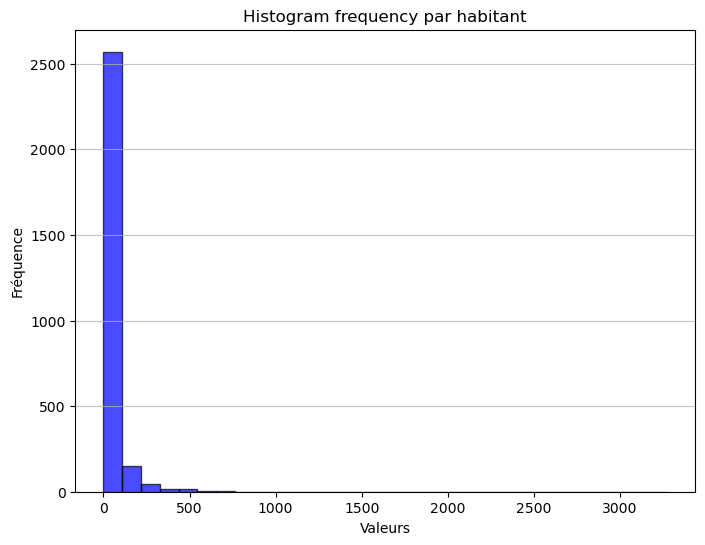

In [12]:
plot_hist(series=(final_dataset['freq_par_hab']),title_suffix="frequency par habitant")